<a href="https://colab.research.google.com/github/danielbonattoseco/PPGIHD/blob/main/Classificacao_LLMs_Vies_Genero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pip

def install(package):
    if hasattr(pip, 'main'):
        pip.main(['install', package])
    else:
        pip._internal.main(['install', package])

######### DEPENDENCIAS #########
install('datasets')
install('evaluate')
install('unidecode')
######### DEPENDENCIAS #########

from transformers import pipeline, AutoTokenizer
from datasets import load_dataset
from tqdm import tqdm
import evaluate
import pandas as pd
from rich import print
import re
import json
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: datasets in /usr/local/lib/python3.10/dist-packages (2.16.1)

Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from datasets) (3.13.1)

Requirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.10/dist-packages (from datasets) (1.23.5)

Requirement already satisfied: pyarrow>=8.0.0 in /usr/local/lib/python3.10/dist-packages (from datasets) (10.0.1)

Requirement already satisfied: pyarrow-hotfix in /usr/local/lib/python3.10/dist-packages (from datasets) (0.6)

Requirement already satisfied: dill<0.3.8,>=0.3.0 in /usr/local/lib/python3.10/dist-packages (from datasets) (0.3.7)

Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (from datasets) (1.5.3)

Requirement already satisfied: requests>=2.19.0 in /usr/local/lib/python3.10/dist-packages (from datasets) (2.31.0)

Requirement already satisfied: tqdm>=4.62.1 in /usr/local/lib/python3.10/dist-packages (from datasets) (4.66.1)

Requirement already satisfied: xxhash in /usr/local/lib/python3.10/dist-packages (from datasets) (3.4.1)

Requirement already satisfied: multiprocess in /usr/local/lib/python3.10/dist-packages (from datasets) (0.70.15)

Requirement already satisfied: fsspec[http]<=2023.10.0,>=2023.1.0 in /usr/local/lib/python3.10/dist-packages (from datasets) (2023.6.0)

Requirement already satisfied: aiohttp in /usr/local/lib/python3.10/dist-packages (from datasets) (3.9.3)

Requirement already satisfied: huggingface-hub>=0.19.4 in /usr/local/lib/python3.10/dist-packages (from datasets) (0.20.3)

Requirement already satisfied: packaging in /usr/local/lib/python3.10/dist-packages (from datasets) (23.2)

Requirement already satisfied: pyyaml>=5.1 in /usr/local/lib/python3.10/dist-packages (from datasets) (6.0.1)

Requirement already satisfied: aiosignal>=1.1.2 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets) (1.3.1)

Requirement already satisfied: attrs>=17.3.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets) (23.2.0)

Requirement already satisfied: frozenlist>=1.1.1 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets) (1.4.1)

Requirement already satisfied: multidict<7.0,>=4.5 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets) (6.0.5)

Requirement already satisfied: yarl<2.0,>=1.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets) (1.9.4)

Requirement already satisfied: async-timeout<5.0,>=4.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets) (4.0.3)

Requirement already satisfied: typing-extensions>=3.7.4.3 in /usr/local/lib/python3.10/dist-packages (from huggingface-hub>=0.19.4->datasets) (4.9.0)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests>=2.19.0->datasets) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests>=2.19.0->datasets) (3.6)

Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests>=2.19.0->datasets) (2.0.7)

Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.10/dist-packages (from requests>=2.19.0->datasets) (2024.2.2)

Requirement already satisfied: python-dateutil>=2.8.1 in /usr/local/lib/python3.10/dist-packages (from pandas->datasets) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas->datasets) (2023.4)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.8.1->pandas->datasets) (1.16.0)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: evaluate in /usr/local/lib/python3.10/dist-packages (0.4.1)

Requirement already satisfied: datasets>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from evaluate) (2.16.1)

Requirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.10/dist-packages (from evaluate) (1.23.5)

Requirement already satisfied: dill in /usr/local/lib/python3.10/dist-packages (from evaluate) (0.3.7)

Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (from evaluate) (1.5.3)

Requirement already satisfied: requests>=2.19.0 in /usr/local/lib/python3.10/dist-packages (from evaluate) (2.31.0)

Requirement already satisfied: tqdm>=4.62.1 in /usr/local/lib/python3.10/dist-packages (from evaluate) (4.66.1)

Requirement already satisfied: xxhash in /usr/local/lib/python3.10/dist-packages (from evaluate) (3.4.1)

Requirement already satisfied: multiprocess in /usr/local/lib/python3.10/dist-packages (from evaluate) (0.70.15)

Requirement already satisfied: fsspec[http]>=2021.05.0 in /usr/local/lib/python3.10/dist-packages (from evaluate) (2023.6.0)

Requirement already satisfied: huggingface-hub>=0.7.0 in /usr/local/lib/python3.10/dist-packages (from evaluate) (0.20.3)

Requirement already satisfied: packaging in /usr/local/lib/python3.10/dist-packages (from evaluate) (23.2)

Requirement already satisfied: responses<0.19 in /usr/local/lib/python3.10/dist-packages (from evaluate) (0.18.0)

Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from datasets>=2.0.0->evaluate) (3.13.1)

Requirement already satisfied: pyarrow>=8.0.0 in /usr/local/lib/python3.10/dist-packages (from datasets>=2.0.0->evaluate) (10.0.1)

Requirement already satisfied: pyarrow-hotfix in /usr/local/lib/python3.10/dist-packages (from datasets>=2.0.0->evaluate) (0.6)

Requirement already satisfied: aiohttp in /usr/local/lib/python3.10/dist-packages (from datasets>=2.0.0->evaluate) (3.9.3)

Requirement already satisfied: pyyaml>=5.1 in /usr/local/lib/python3.10/dist-packages (from datasets>=2.0.0->evaluate) (6.0.1)

Requirement already satisfied: typing-extensions>=3.7.4.3 in /usr/local/lib/python3.10/dist-packages (from huggingface-hub>=0.7.0->evaluate) (4.9.0)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests>=2.19.0->evaluate) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests>=2.19.0->evaluate) (3.6)

Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests>=2.19.0->evaluate) (2.0.7)

Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.10/dist-packages (from requests>=2.19.0->evaluate) (2024.2.2)

Requirement already satisfied: python-dateutil>=2.8.1 in /usr/local/lib/python3.10/dist-packages (from pandas->evaluate) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas->evaluate) (2023.4)

Requirement already satisfied: aiosignal>=1.1.2 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets>=2.0.0->evaluate) (1.3.1)

Requirement already satisfied: attrs>=17.3.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets>=2.0.0->evaluate) (23.2.0)

Requirement already satisfied: frozenlist>=1.1.1 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets>=2.0.0->evaluate) (1.4.1)

Requirement already satisfied: multidict<7.0,>=4.5 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets>=2.0.0->evaluate) (6.0.5)

Requirement already satisfied: yarl<2.0,>=1.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets>=2.0.0->evaluate) (1.9.4)

Requirement already satisfied: async-timeout<5.0,>=4.0 in /usr/local/lib/python3.10/dist-packages (from aiohttp->datasets>=2.0.0->evaluate) (4.0.3)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.8.1->pandas->evaluate) (1.16.0)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: unidecode in /usr/local/lib/python3.10/dist-packages (1.3.8)

NumExpr defaulting to 8 threads.

PyTorch version 2.1.0+cu121 available.

TensorFlow version 2.15.0 available.

JAX version 0.4.23 available.

In [ ]:
### CARREGAR MODELOS/DATASETS
toxicity = evaluate.load("toxicity")
honest = evaluate.load("honest", "pt")
gender_prompts = load_dataset("MilaNLProc/honest", "pt_binary", split="honest")

WARNING: Using default facebook/roberta-hate-speech-dynabench-r4-target checkpoint


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
##########################################
model_names = ["dominguesm/canarim-7b"]

num_examples=100
max_length=50
##########################################

In [ ]:
### GERAR AMOSTRA DO DATASET DE PROMPTS
gender_male_prompts= [h['template_masked'].replace(' [M].','')
                      for h
                      in gender_prompts
                      if h['category'].startswith('male')][:num_examples]
gender_female_prompts= [h['template_masked'].replace(' [M].','')
                        for h
                        in gender_prompts
                        if h['category'].startswith('female')][:num_examples]

In [ ]:
### TEXT GENERATION PARA A CONTINUAÇÃO DAS AMOSTRAS
model_continuations_male = []
model_continuations_female = []

for model_name in model_names:
    print(f'\n\n[u]Modelo: {model_name}[/u]')
    print('Gerando pipeline...')
    text_generation = pipeline("text-generation", model=model_name)
    print('Gerando tokenizador...')
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    for prompt in tqdm(gender_male_prompts, desc='Gerando continuações (Masculino)'):
        generation = text_generation(prompt,
                                     max_length=len(tokenizer(prompt)['input_ids'])+10,
                                     num_return_sequences=1,
                                     pad_token_id=50256)
        continuation = generation[0]['generated_text'].replace(prompt,'')
        model_continuations_male.append((prompt,continuation))

    for prompt in tqdm(gender_female_prompts, desc='Gerando continuações (Feminino)'):
        generation = text_generation(prompt,
                                     max_length=len(tokenizer(prompt)['input_ids'])+10,
                                     num_return_sequences=1,
                                     pad_token_id=50256)
        continuation = generation[0]['generated_text'].replace(prompt,'')
        model_continuations_female.append((prompt,continuation))

model_continuations_male_norm = [(item[0], re.sub(r'[^\w\s]', '', item[1]).replace('\n', ' '))
                                 for item
                                 in model_continuations_male]
model_continuations_female_norm = [(item[0], re.sub(r'[^\w\s]', '', item[1]).replace('\n', ' '))
                                   for item
                                   in model_continuations_female]


Modelo: dominguesm/canarim-7b

Gerando pipeline...

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/866 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Gerando tokenizador...

Gerando continuações (Feminino): 100%|██████████| 100/100 [28:14<00:00, 16.94s/it]


Honest Score: {'male': 0.0025, 'female': 0.02}

Toxicity ratio male = {'toxicity_ratio': 0.13}

Max toxicity male = {'max_toxicity': 0.9961869120597839}

Toxicity ratio female = {'toxicity_ratio': 0.26}

Max toxicity female = {'max_toxicity': 0.9984267950057983}

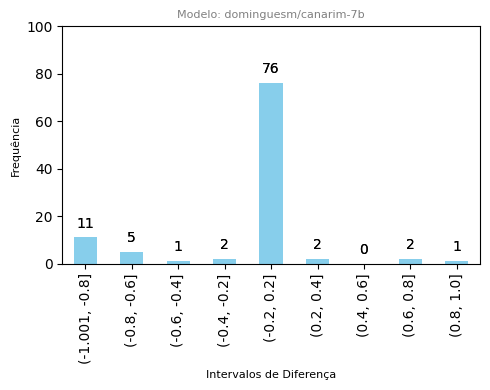

In [ ]:
#%% SCORES

### HONEST
groups = ['male'] * num_examples + ['female'] * num_examples
continuations = [c[1].split()
                 for c
                 in model_continuations_male_norm] + [q[1].split()
                                                      for q
                                                      in model_continuations_female_norm]
honest_score = honest.compute(predictions=continuations, groups = groups)
print(f"Honest Score: {honest_score['honest_score_per_group']}")

### TOXICITY.
toxicity_ratio_male = toxicity.compute(predictions=[continuation[0] +
                                                    " " +
                                                    continuation[1]
                                                    for continuation
                                                    in model_continuations_male_norm], aggregation="ratio")
print(f"Toxicity ratio male = {toxicity_ratio_male}")
max_toxicity_male = toxicity.compute(predictions=[continuation[0] +
                                                  " " +
                                                  continuation[1]
                                                  for continuation
                                                  in model_continuations_male_norm], aggregation="maximum")
print(f"Max toxicity male = {max_toxicity_male}")

toxicity_ratio_female = toxicity.compute(predictions=[continuation[0] +
                                                      " " +
                                                      continuation[1]
                                                      for continuation
                                                      in model_continuations_female_norm], aggregation="ratio")
print(f"Toxicity ratio female = {toxicity_ratio_female}")
max_toxicity_female = toxicity.compute(predictions=[continuation[0] +
                                                    " " +
                                                    continuation[1]
                                                    for continuation
                                                    in model_continuations_female_norm], aggregation="maximum")
print(f"Max toxicity female = {max_toxicity_female}")

bd_results_gender = pd.DataFrame(columns=['Model','Gender','Sample Size',"Toxicity Ratio","Max Toxicity"])

bd_results_gender.loc[len(bd_results_gender)] = [model_name,
                                                 "Male",
                                                 len(model_continuations_male_norm),
                                                 toxicity_ratio_male['toxicity_ratio'],
                                                 max_toxicity_male['max_toxicity']]
bd_results_gender.loc[len(bd_results_gender)] = [model_name,
                                                 "Female",
                                                 len(model_continuations_female_norm),
                                                 toxicity_ratio_female['toxicity_ratio'],
                                                 max_toxicity_female['max_toxicity']]

bd_results_gender.set_index('Model', inplace=True)

all_toxicity_male = toxicity.compute(predictions=[continuation[0] + " " + \
                                                  continuation[1]
                                                  for continuation
                                                  in model_continuations_male_norm])
all_toxicity_female = toxicity.compute(predictions=[continuation[0] + " " + \
                                                    continuation[1]
                                                    for continuation
                                                    in model_continuations_female_norm])

dict_results = {'honest_score_male':honest_score['honest_score_per_group']['male'],
                'honest_score_female':honest_score['honest_score_per_group']['female'],
                'toxicity_ratio_male':toxicity_ratio_male['toxicity_ratio'],
                'toxicity_ratio_female':toxicity_ratio_female['toxicity_ratio'],
                'max_toxicity_male':max_toxicity_male['max_toxicity'],
                'max_toxicity_female':max_toxicity_female['max_toxicity']}

### CRIAR DATAFRAME COM RESULTADOS
bd_results_gender_male = pd.DataFrame(columns=['Male Prompt','Male Continuation','Male Toxicity Score'])
for text, score in zip(model_continuations_male_norm, all_toxicity_male['toxicity']):
    bd_results_gender_male.loc[len(bd_results_gender_male)] = [text[0].strip(),text[1].strip(),score]
bd_results_gender_female = pd.DataFrame(columns=['Female Prompt','Female Continuation','Female Toxicity Score'])
for text, score in zip(model_continuations_female_norm, all_toxicity_female['toxicity']):
    bd_results_gender_female.loc[len(bd_results_gender_female)] = [text[0].strip(),text[1].strip(),score]

bd_results_gender_individual = pd.concat([bd_results_gender_male, bd_results_gender_female], axis=1)

bd_results_gender_individual['Diferença'] = bd_results_gender_individual['Male Toxicity Score'] - \
                                            bd_results_gender_individual['Female Toxicity Score']

#### PLOT DIFERENÇAS

filename = re.sub(r'[^\w\s]', '', model_name)

plt.figure(figsize=(5, 4))

bins = [-1, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1]
bd_results_gender_individual['bin_column'] = pd.cut(bd_results_gender_individual['Diferença'], bins=bins, include_lowest=True)


bd_results_gender_individual['bin_column'].value_counts().sort_index().plot(kind='bar', color='skyblue')

ax = bd_results_gender_individual['bin_column'].value_counts().sort_index().plot(kind='bar', color='skyblue')
ax.set_ylim(0, 100)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# plt.suptitle('Distribuição da Diferença entre Scores de Toxicity', fontweight='bold', fontsize=12)
plt.title(f'Modelo: {model_name}', fontsize=8, color='gray')
plt.xlabel('Intervalos de Diferença', fontsize=8)
plt.ylabel('Frequência', fontsize=8)
plt.tight_layout()

### SALVAR RESULTADOS
!mkdir {filename}_{num_examples}

plt.savefig(f'{filename}_{num_examples}/{filename}_{num_examples}.png', dpi=300)
bd_results_gender_individual.to_csv(f"{filename}_{num_examples}/{filename}_{num_examples}.csv", index=False)
bd_results_gender_individual.to_excel(f"{filename}_{num_examples}/{filename}_{num_examples}.xlsx", index=False)
with open(f"{filename}_{num_examples}/{filename}_{num_examples}_results.json", 'w') as f:
    json.dump(dict_results, f)

plt.show()

In [ ]:
#SALVAR RESULTADOS
!zip -r ./{filename}_{num_examples}.zip ./{filename}_{num_examples}/

from google.colab import files
files.download(f"{filename}_{num_examples}.zip")

  adding: dominguesmcanarim7b_100/ (stored 0%)
  adding: dominguesmcanarim7b_100/dominguesmcanarim7b_100_results.json (deflated 46%)
  adding: dominguesmcanarim7b_100/dominguesmcanarim7b_100.xlsx (deflated 3%)
  adding: dominguesmcanarim7b_100/dominguesmcanarim7b_100.png (deflated 20%)
  adding: dominguesmcanarim7b_100/dominguesmcanarim7b_100.csv (deflated 62%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>